In [1]:
import pulp
import matplotlib.pyplot as plot
import networkx as nx
import math

# This function takes as input a graph g.
# The graph is complete (i.e., each pair of distinct vertices is connected by an edge),
# undirected (i.e., the edge from u to v has the same weight as the edge from v to u),
# and has no self-loops (i.e., there are no edges from i to i).
#
# This function finds an optimal Hamiltonian path using an Integer Linear Programing solver.

def ilp(g):
    # n is the number of vertices.
    n = g.number_of_nodes()

    # Define a new Integer Linear Program.
    m = pulp.LpProblem('TSP', pulp.LpMinimize)

    # Define variables x_i_j for 1 <= i,j <= n corresponding to the directed edges from i to j.
    # Each variable is of the Binary type (i.e., it can take on either 0 or 1).
    # An edge (i,j) will be taken in an optimal Hamiltonian cycle if and only if x_i_j == 1.
    x = [[pulp.LpVariable('x_' + str(i) + '_' + str(j), cat='Binary')
         for i in range(n)] for j in range(n)]

    # Never take self-loops (an edge from i to i).
    for i in range(n):
        m += pulp.lpSum(x[i][i]) == 0

    # Make sure the self-loops areof weight 0.
    for i in range(n):
      g.add_edge(i, i, weight = 0)
    # The objective function (to be minimized) is the sum of the weights of taken edges
    m += pulp.lpSum([g[i][j]['weight'] * x[i][j] for i in range(n) for j in range(n)])

    # Add the constraints saying that each vertex has exactly one outgoing edge.
    for i in range(n):
        m += pulp.lpSum([x[i][j] for j in range(n)]) == 1

    # Add the constraints saying that each vertex has exactly one incoming edge.
    for i in range(n):
        m += pulp.lpSum([x[j][i] for j in range(n)]) == 1

    # Introduce auxiliary variables u_i for 0 <= i <= n-1.
    u = []
    # u_0 = 0
    u.append(pulp.LpVariable('u_0', 1, 1, cat='Integer'))
    # For i > 0, we have that 2 <= u_i <= n.
    for i in range(1, n):
        u.append(pulp.LpVariable('u_' + str(i), 2, n, cat='Integer'))

    # In order to ensure that we find *one* cycle covering all vertices,
    # for every i, j > 0, we add the constraint u_i - u_j + n * x_i_j <= n-1
    for i in range(1, n):
        for j in range(1, n):
            m += pulp.lpSum([u[i] - u[j] + n * x[i][j]]) <= n - 1

    # Solve the constructed Integer Linear Program.
    m.solve()

    # Compute the weight of the resulting cycle.
    weight = sum([g[i][j]['weight'] * pulp.value(x[i][j]) for i in range(n) for j in range(n)])
    print('The minimal cycle length is %f' % weight)
    
    # Extract cycle from the matrix x
    cycleMatrix = [[pulp.value(x[i][j]) for i in range(n)] for j in range(n)]
    i = 0
    i = cycleMatrix[0].index(1)
    cycle = [i]
    while (i != 0):
        i = cycleMatrix[i].index(1)
        cycle.append(i)
    return cycle

In [2]:
# This function computes the distance between two points.
def dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# This function receives a list of 2-tuples representing the points' coordinates,
# and returns the corresponding graph.
def get_graph(coordinates):
    g = nx.Graph()
    n = len(coordinates)
    for i in range(n):
        for j in range(i + 1):
            g.add_edge(i, j, weight=dist(coordinates[i][0], coordinates[i][1], coordinates[j][0], coordinates[j][1]))
    return g

# This function takes
# 1. a list of 2-tuples which represent the coordinates of the given points
# 2. and a cycle to be visualized.
def plot_cycle(coordinates, cycle):
    # Compute the x and y coordinates in the order according to the cycle
    x_coordinates = [coordinates[i][0] for i in cycle]
    y_coordinates = [coordinates[i][1] for i in cycle]

    # Add the first vertex of the cycle (to close the cycle)
    x_coordinates.append(coordinates[cycle[0]][0])
    y_coordinates.append(coordinates[cycle[0]][1])

    plot.plot(x_coordinates, y_coordinates, 'xb-', )
    plot.show()

The minimal cycle length is 747.966255


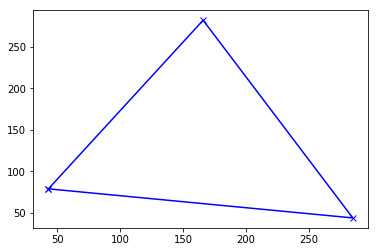

In [3]:
# Example 1
# Consider the following 3 points.
coordinates = [(166, 282), (43, 79), (285, 44)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)

The minimal cycle length is 883.657081


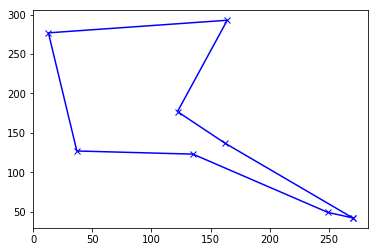

In [4]:
# Example 2
# Consider the following 8 points.
coordinates = [(162, 137), (122, 177), (249, 49), (37, 127), (13, 277), (164, 293), (270, 42), (135, 123)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)

The minimal cycle length is 702.693410


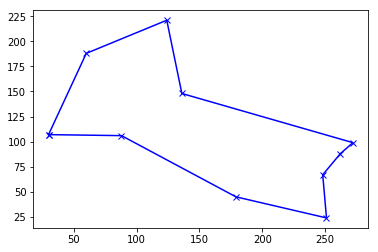

In [5]:
# Example 3
# Consider the following 10 points.
coordinates = [(88, 106), (248, 67), (251, 24), (124, 221), (136, 148), (262, 88), (179, 45), (60, 188), (272, 99), (30, 107)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)

The minimal cycle length is 1010.073180


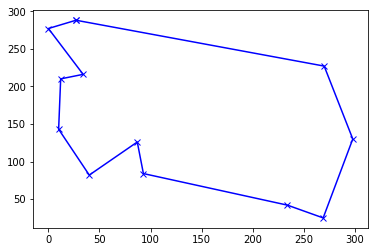

In [6]:
# Example 4
# Consider the following 12 points.
coordinates = [(0, 277), (234, 42), (269, 25), (12, 210), (298, 130), (10, 143), (270, 227), (87, 126), (34, 216), (93, 84), (40, 82), (27, 288)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)

The minimal cycle length is 1100.880975


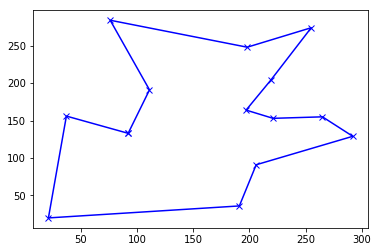

In [7]:
# Example 5
# Consider the following 14 points.
coordinates = [(111, 191), (197, 164), (219, 204), (206, 91), (255, 274), (265, 155), (76, 284), (292, 129), (191, 36), (37, 156), (21, 20), (198, 248), (221, 153), (92, 133)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)

The minimal cycle length is 1362.487618


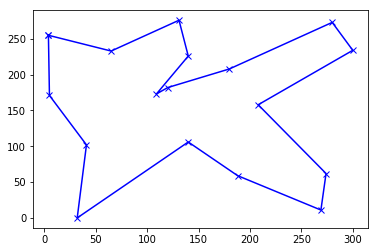

In [8]:
# Example 6
# Consider the following 17 points.
coordinates = [(5, 171), (109, 173), (4, 255), (208, 158), (269, 11), (280, 273), (32, 0), (188, 59), (180, 208), (140, 106), (131, 276), (65, 233), (274, 62), (120, 182), (300, 234), (41, 102), (140, 226)]
# Create a corresponding graph.
g = get_graph(coordinates)
# Compute an optimal Hamiltonian path using Integer Linear Programming:
cycle = ilp(g)
# Plot the resulting cycle
plot_cycle(coordinates, cycle)